# Exploring Image Similarity to remove duplicate images

**Deep Learning-Based Approaches**

Deep learning has revolutionized image similarity tasks. Using pre-trained convolutional neural networks (CNNs) like ResNet, VGG, and Inception, you can extract deep features from images.

CLIP (Contrastive Language-Image Pre-Training) from the openAI is an impressive multimodal zero-shot image classifier that achieves impressive results in a wide range of domains with no fine-tuning. It applies the recent advancements in large-scale transformers like GPT-3 to the vision arena.

We can fine-tune these models on our own image and text data with the regular SentenceTransformers training code. ScrapeHero helps in preparing your own image dataset to train these models. Its web crawling service can crawl complex websites and provides high-quality data.

Here, we’ll demonstrate a simple example using CLIP-Based pre-trained model and the torch, open_clip & sentence_transformers libraries:

In [1]:
import torch
import open_clip
import cv2
from sentence_transformers import util
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

c:\Users\matte\.pyenv\myenv\.plasticdetection\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load model

In [2]:
# image processing model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 896, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=896, out_features=896, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=896, out_features=3584, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3584, out_features=896, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((896,), eps=1e-05, elementwise_affine

## Test

In [3]:
image1 = '../Dataset-20241229T161246Z-001\Dataset/train\images/2_jpg.rf.c8f4ea6db119a47e01fc5629d1065b6b.jpg'
image2 = '../Dataset-20241229T161246Z-001\Dataset/train\images/2_jpg.rf.c8f4ea6db119a47e01fc5629d1065b6b.jpg'

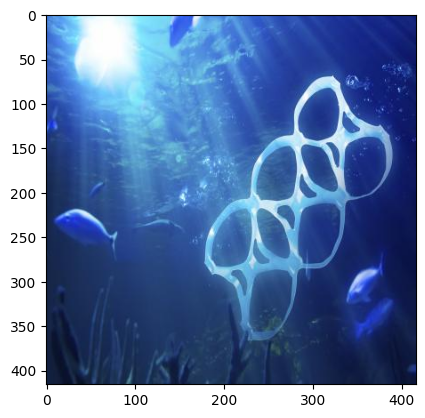

In [4]:
img1 = np.array(Image.open(image1))
plt.imshow(img1)

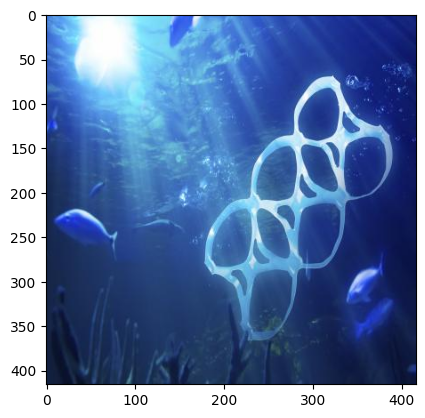

In [5]:
img2 = np.array(Image.open(image2))
plt.imshow(img2)

In [6]:
def imageEncoder(img):
    img1 = Image.fromarray(img).convert('RGB')
    img1 = preprocess(img1).unsqueeze(0).to(device)
    img1 = model.encode_image(img1)
    return img1

def generateScore(image1, image2):
    test_img = cv2.imread(image1, cv2.IMREAD_UNCHANGED)
    data_img = cv2.imread(image2, cv2.IMREAD_UNCHANGED)
    img1 = imageEncoder(test_img)
    img2 = imageEncoder(data_img)
    cos_scores = util.pytorch_cos_sim(img1, img2)
    score = float(cos_scores[0][0])*100
    return score

In [7]:
print(f"similarity Score: ", round(generateScore(image1, image2), 2))

similarity Score:  100.0


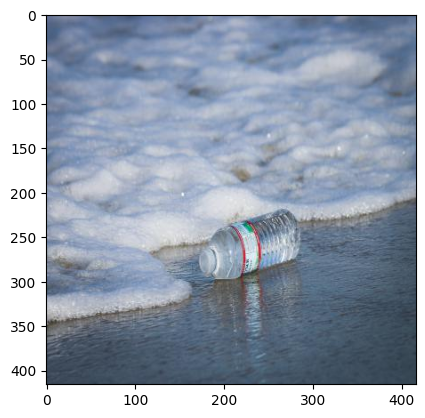

In [8]:
image3 = '../Dataset-20241229T161246Z-001\Dataset/train\images/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg'
img3 = np.array(Image.open(image3))
plt.imshow(img3)

In [9]:
print(f"similarity Score: ", round(generateScore(image1, image3), 2))

similarity Score:  34.31


In [10]:
# other 
image1 = '../Dataset-20241229T161246Z-001\Dataset/train\images/vid_000148_frame0000050_jpg.rf.17c62a42f2c1d12c41be3bd30d08834b.jpg'
image2 = '../Dataset-20241229T161246Z-001\Dataset/train\images/vid_000148_frame0000022_jpg.rf.57229ca0ba96d1e6a61ba809dbd1436a.jpg'

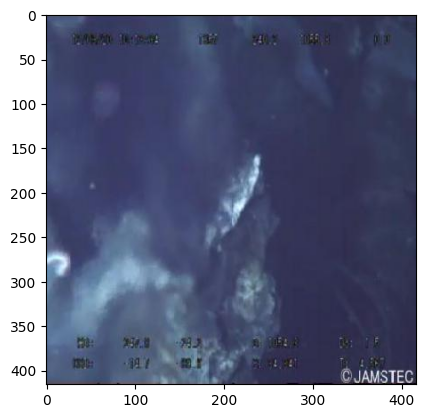

In [11]:
img1 = np.array(Image.open(image1))
plt.imshow(img1)

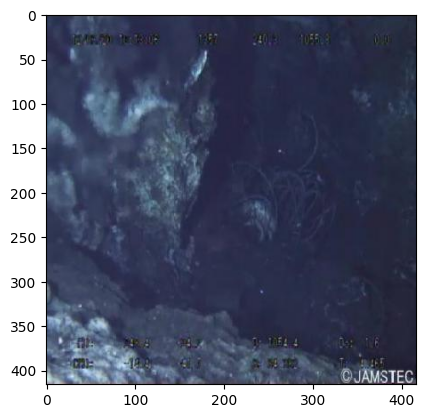

In [12]:
img2 = np.array(Image.open(image2))
plt.imshow(img2)

In [13]:
print(f"similarity Score: ", round(generateScore(image1, image2), 2))

similarity Score:  88.91


## Final test

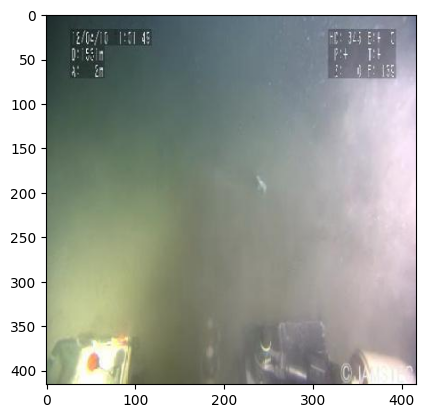

In [15]:
current_image = 'vid_000158_frame0000096_jpg.rf.0023efc82001ce656c0c0479c08edf5d.jpg'
current_image_path = '../Dataset-20241229T161246Z-001\Dataset/train\images/vid_000158_frame0000096_jpg.rf.0023efc82001ce656c0c0479c08edf5d.jpg'
img = np.array(Image.open(current_image_path))
plt.imshow(img)

In [16]:
import os
from tqdm import tqdm
# Specify the folder path
folder_path = "../Dataset-20241229T161246Z-001\Dataset/train\images/"

# List all files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
similarities = {}
print("Files in folder:")
for file in tqdm(file_names):
    if file == current_image:
        continue 
    similarities[file] = generateScore(current_image_path, os.path.join(folder_path, file))

Files in folder:


100%|██████████| 1876/1876 [10:31<00:00,  2.97it/s]


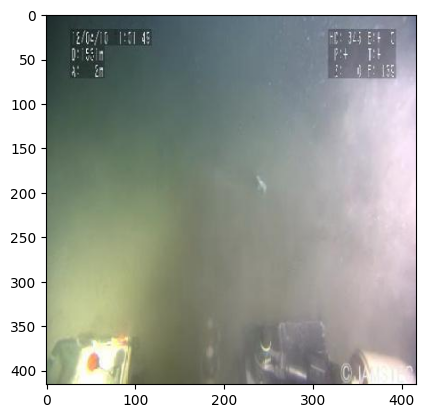

In [23]:
# reference image 
current_image = 'vid_000158_frame0000096_jpg.rf.0023efc82001ce656c0c0479c08edf5d.jpg'
current_image_path = '../Dataset-20241229T161246Z-001\Dataset/train\images/vid_000158_frame0000096_jpg.rf.0023efc82001ce656c0c0479c08edf5d.jpg'
img = np.array(Image.open(current_image_path))
plt.imshow(img)

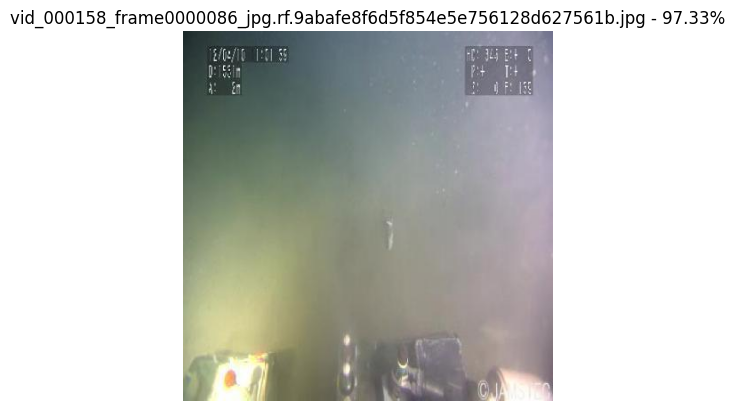

----------------------------------------------------------------------------------------------------


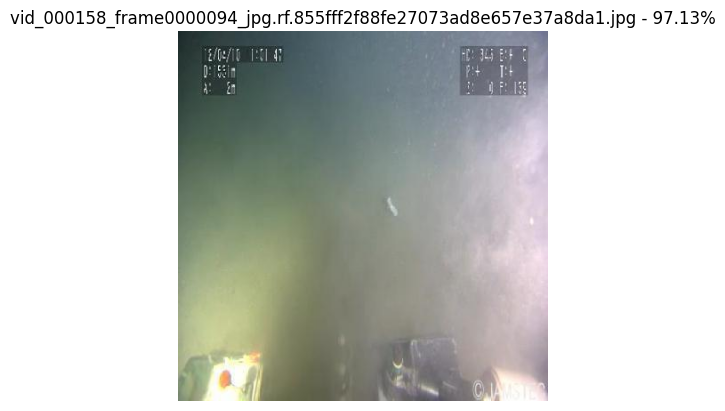

----------------------------------------------------------------------------------------------------


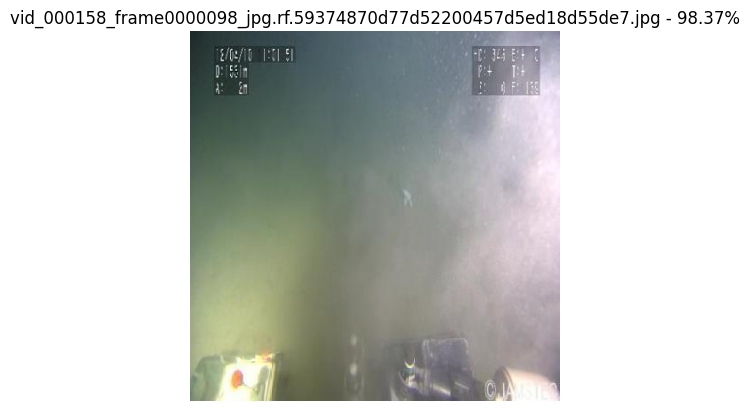

----------------------------------------------------------------------------------------------------


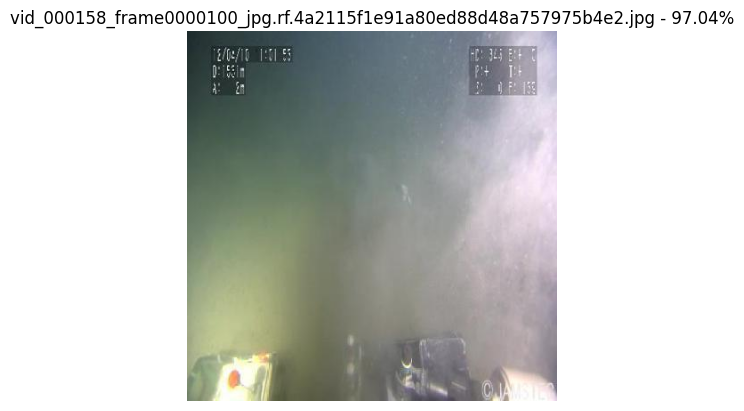

----------------------------------------------------------------------------------------------------


In [ ]:
threshold = 95
breaker = 10
for file, similarity_score in similarities.items():
    if breaker == 0:
        break
    if similarity_score >= threshold:
        # Construct the full image path
        image_path = os.path.join(folder_path, file)
        
        img = np.array(Image.open(image_path))
        plt.imshow(img)
        plt.axis('off')  # Turn off axis for a cleaner display
        plt.title(f"{file} - {similarity_score}%")
        plt.show()
        print('-' * 100)
        breaker -= 1
